In [3]:
import pandas as pd
df=pd.read_csv('/home/adish/Desktop/HR_comma_sep.txt')
df.columns=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years','Department','salary']
df.to_csv(r'/home/adish/Desktop/HR_data.csv',index=False,header=True)

In [7]:
df.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## 1)Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
## 2)Plot bar charts showing impact of employee salaries on retention
## 3)Plot bar charts showing corelation between department and employee retention
## 4)Now build logistic regression model using variables that were narrowed down in step 1
## 5)Measure the accuracy of the model

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('/home/adish/Desktop/HR_data.csv')
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Data exploration and visualisation

In [23]:
emp_left=df[df.left==1]
print('\n')
print('(Number of employees,who left)/(total number of employee) = {} / {}'.format(emp_left.shape[0],df.shape[0]))
emp_retained=df[df.left==0]
print('\n')
print('(Number of employees,who retained)/(total number of employee) = {} / {}'.format(emp_retained.shape[0],df.shape[0]))
print('\n')



(Number of employees,who left)/(total number of employee) = 3571 / 14999


(Number of employees,who retained)/(total number of employee) = 11428 / 14999




### Average

In [24]:
df.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

In [29]:
pd.crosstab(df.salary,df.left,margins=True) #crosstab: a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables

left        0     1    All
salary                    
high     1155    82   1237
low      5144  2172   7316
medium   5129  1317   6446
All     11428  3571  14999

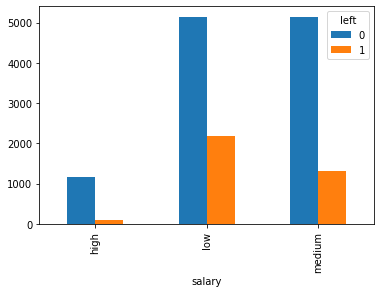

In [30]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

### conclusion: High salaried persons are more likely to be retained

### Department --> any relation with employee retention rate?

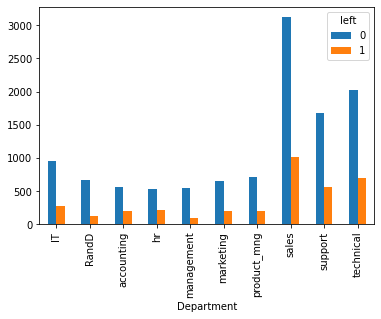

In [31]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

### conclusion: It can be seen that sales dep. has the very low employee retention rate.

### but , we cant take dep. as a parameter to judge retention.

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model

1)Satisfaction Level

2)Average Monthly Hours

3)Promotion Last 5 Years

4)Salary

In [32]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low


### Remove Dummy variables in salary column(low,medium,high)

Salary has all text data. 

It needs to be converted to numbers and we will use dummy variable for that

In [35]:
salary = pd.get_dummies(df1.salary)
salary


high  low  medium
0         0    1       0
1         0    0       1
2         0    0       1
3         0    1       0
4         0    1       0
...     ...  ...     ...
14994     0    1       0
14995     0    1       0
14996     0    1       0
14997     0    1       0
14998     0    1       0

[14999 rows x 3 columns]

In [37]:
df_with_dummies = pd.concat([df1,salary],axis='columns')
df_with_dummies

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary  high  low  medium  
0         low     0    1       0  
1      medium     0    0       1  
2      medium     0    0       1  
3         low     0    1       0  
4         low     0    1       0  
...       ...   ...  ...     ...  
14994     low     0    1       0  
14995     low     0    1       0  
14996     low     0    1       0  
14997     low     0    1       0  
14998     low     0    1       0  

[14999 rows x 7 columns]

### we need to remove salary column which is text data and replaced with dummy

In [38]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  high  low  \
0                0.38                   157                      0     0    1   
1                0.80                   262                      0     0    0   
2                0.11                   272                      0     0    0   
3                0.72                   223                      0     0    1   
4                0.37                   159                      0     0    1   

   medium  
0       0  
1       1  
2       1  
3       0  
4       0

In [39]:
x=df_with_dummies
y=df.left

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.1)

In [41]:
xtest

satisfaction_level  average_montly_hours  promotion_last_5years  high  \
2615                 0.72                   270                      0     0   
13175                0.52                   176                      0     0   
13650                0.77                   260                      0     0   
13019                0.27                   185                      0     0   
2094                 0.48                   151                      0     0   
...                   ...                   ...                    ...   ...   
5994                 0.80                   255                      0     0   
11025                0.67                   171                      0     0   
12345                0.10                   278                      0     1   
1719                 0.77                   249                      0     0   
11481                0.83                   157                      0     0   

       low  medium  
2615     1       0  
13175    1       0  
13650    0       1  
13019    1       0  
2094     0       1  
...    ...     ...  
5994     1       0  
11025    1       0  
12345    0       0  
1719     1       0  
11481    0       1  

[1500 rows x 6 columns]

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
reg_model=LogisticRegression()
reg_model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
reg_model.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
ytest

2615     0
13175    0
13650    0
13019    0
2094     0
        ..
5994     0
11025    0
12345    1
1719     1
11481    0
Name: left, Length: 1500, dtype: int64

In [47]:
xtest

satisfaction_level  average_montly_hours  promotion_last_5years  high  \
2615                 0.72                   270                      0     0   
13175                0.52                   176                      0     0   
13650                0.77                   260                      0     0   
13019                0.27                   185                      0     0   
2094                 0.48                   151                      0     0   
...                   ...                   ...                    ...   ...   
5994                 0.80                   255                      0     0   
11025                0.67                   171                      0     0   
12345                0.10                   278                      0     1   
1719                 0.77                   249                      0     0   
11481                0.83                   157                      0     0   

       low  medium  
2615     1       0  
13175    1       0  
13650    0       1  
13019    1       0  
2094     0       1  
...    ...     ...  
5994     1       0  
11025    1       0  
12345    0       0  
1719     1       0  
11481    0       1  

[1500 rows x 6 columns]

In [49]:
reg_model.score(xtest,ytest)

0.7866666666666666

In [51]:
reg_model.predict_proba(xtest)


array([[0.78666097, 0.21333903],
       [0.68292126, 0.31707874],
       [0.87875833, 0.12124167],
       ...,
       [0.67546697, 0.32453303],
       [0.82314478, 0.17685522],
       [0.91925994, 0.08074006]])